# LBYME2D-EE1 Exercise 05
## Vince Lander Esquillo
## ID 11839902

# Transmission Angles

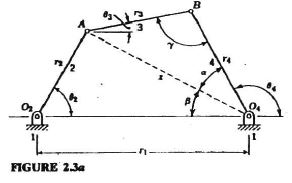

The value z is given by:
$$z^2=r_1^2+r_2^2-2r_1r_2\cos\theta_2\quad\&\quad z^2=r_3^2+r_4^2-2r_3r_4\cos\gamma$$ 
</br>
Equating both expressions of $z^2$ to each other, we have:
$$r_1^2+r_2^2-2r_1r_2\cos\theta_2=r_3^2+r_4^2-2r_3r_4\cos\gamma$$
Isolating $\gamma$, we obtain:
$$\gamma=\cos^{-1}\left[\dfrac{r_1^2+r_2^2-r_3^2-r_4^2-2r_1r_2\cos\theta_2}{-2r_3r_4}\right]\quad\rightarrow\quad\boxed{\gamma=\cos^{-1}\left[\dfrac{z^2-r_3^2-r_4^2}{-2r_3r_4}\right]}$$

The angles $\alpha,\:\beta,\:\&\:\theta_4$ are given by:
$$\alpha=\cos^{-1}\left(\dfrac{z^2+r_4^2-r_3^2}{2zr_4}\right)$$
$$\beta=\cos^{-1}\left(\dfrac{z^2+r_1^2-r_2^2}{2zr_1}\right)$$
$$\theta_4=180^\circ-(\alpha-\beta)$$

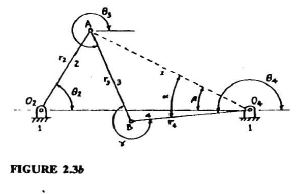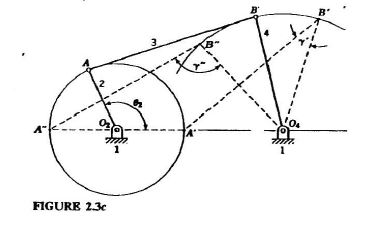

Note for $\beta$:</n>
In general, for
$0^\circ\leq\theta_2<180^\circ$ $\beta$ should be selected such that $0^\circ\leq\beta<180^\circ$; and similarly for
$180^\circ\leq\theta_2<360^\circ$ $\beta$ should be selected such that $180^\circ\leq\beta<360^\circ$. With $\beta$ selected
in this way, the two values of $\alpha$ will yield values of $\theta_4$ corresponding to
the two distinct closures of the linkage.

## Sample Problem
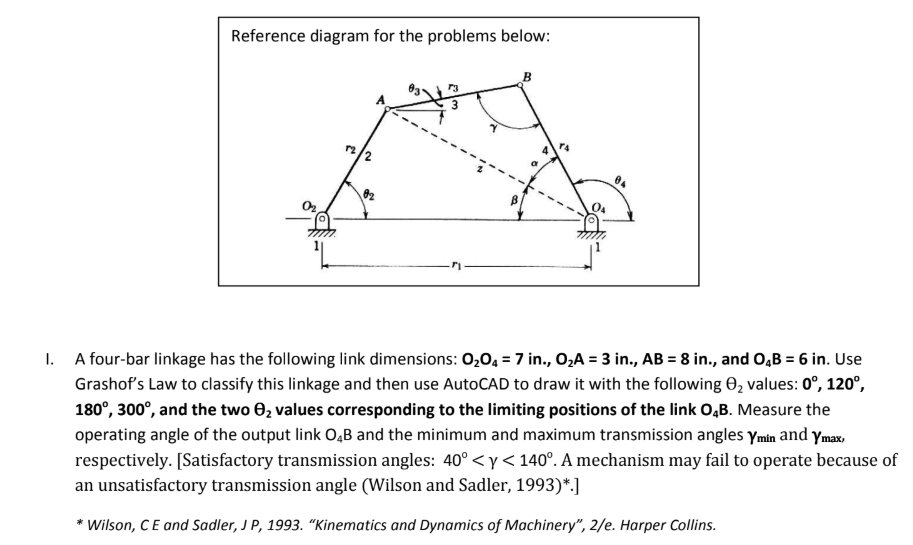

## Grashof Law Implementation

In [1]:
def grashof(r1,r2,r3,r4):
    list=(r1,r2,r3,r4)
    temp=sorted(list)
    s,p,q,l=(temp[0],temp[1],temp[2],temp[3])
    if (s+l)<(p+q):
        print('Type I Grashof')
        print('s+l<p+q:',s+l,'<',p+q)
        if s==r1:
            print('Subtype: Double-Rocker')
        elif s==r2 or s==r4:
            print('Subtype: Crank-Rocker')
        else:
            print('Subtype: Double Crank')
    elif (s+l)>(p+q):
        print('Type II Grashof')
        print('s+l>p+q',s+l,'>',p+q)
    else:
        print('Special Case: Type III Grashof')
        print('s+l=p+q,',s+l,'=',p+q)

In [2]:
grashof(7,3,8,6)

Type I Grashof
s+l<p+q: 11 < 13
Subtype: Crank-Rocker


## Transmission Angle Implementation

In [3]:
import numpy as np

In [4]:
def t_angle(r1,r2,r3,r4,theta_2):
    """Given values are all with respect to x. CCW(+) & CW(-)"""
    theta_2=theta_2*(np.pi/180)
    z = np.sqrt(r1**2+r2**2-(2*r1*r2*np.cos(theta_2)))
    gamma = np.arccos((z**2-r3**2-r4**2)/(-2*r3*r4))*(180/np.pi)
    alpha=np.arccos((z**2+r4**2-r3**2)/(2*z*r4))*(180/np.pi)
    if theta_2>=0 and theta_2<np.pi:
        beta=np.arccos((z**2+r1**2-r2**2)/(2*z*r1))*(180/np.pi)
    elif theta_2>=np.pi and theta_2<2*np.pi:
        beta=-np.arccos((z**2+r1**2-r2**2)/(2*z*r1))*(180/np.pi)
    theta_4=(180-(alpha+beta))
    print('gamma =',gamma,'°, ','alpha =',alpha,'°, ','beta =',beta,'°, ','theta_4 =',theta_4,'°')

In [5]:
t_angle(7,3,8,6,0)

gamma = 28.95502437185985 °,  alpha = 104.47751218592994 °,  beta = 0.0 °,  theta_4 = 75.52248781407006 °


In [6]:
t_angle(7,3,8,6,120)

gamma = 77.36437490697888 °,  alpha = 61.43454865809468 °,  beta = 16.996088057177186 °,  theta_4 = 101.56936328472814 °


In [7]:
t_angle(7,3,8,6,180)

gamma = 90.0 °,  alpha = 53.13010235415599 °,  beta = -0.0 °,  theta_4 = 126.86989764584402 °


In [8]:
t_angle(7,3,8,6,300)

gamma = 48.985500334269474 °,  alpha = 82.91745034433292 °,  beta = -25.284996046051784 °,  theta_4 = 122.36754570171887 °


In [9]:
t_angle(7,3,8,6,237.1216504356225)

gamma = 78.46304096718451 °,  alpha = 60.692698806934786 °,  beta = -16.277390209741796 °,  theta_4 = 135.584691402807 °


## Minimum and Maximum Transmission Angle

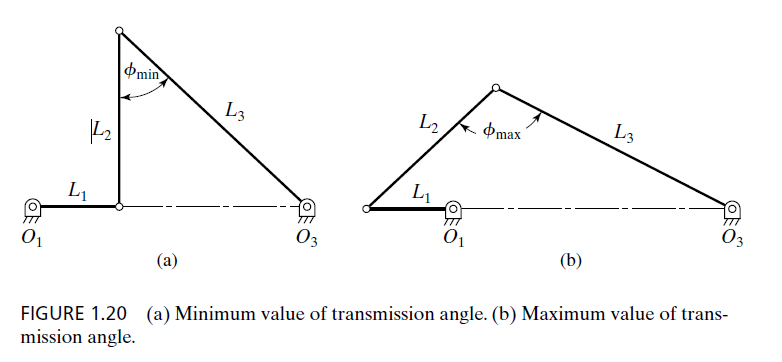

From the diagrams above, it is shown that:

$$\theta_2=0^\circ\text{ at } \gamma_{min}\quad\&\quad \theta_2=180^\circ\text{ at } \gamma_{max}$$

Furthermore, there are values of z specifically given for $\gamma_{min}$ and $\gamma_{max}$. These are:
$$\text{at}\:\:\gamma_{min}:\:\:z=r_1-r_2\quad\&\quad \text{at}\:\:\gamma_{max}:\:\:z=r_1+r_2$$

In [10]:
def t_anglemin(r1,r2,r3,r4):
    """Given values are all with respect to x. CCW(+) & CW(-)"""
    z = r1-r2
    gamma = np.arccos((z**2-r3**2-r4**2)/(-2*r3*r4))*(180/np.pi)
    alpha=np.arccos((z**2+r4**2-r3**2)/(2*z*r4))*(180/np.pi)
    beta=np.arccos((z**2+r1**2-r2**2)/(2*z*r1))*(180/np.pi)
    theta_4=(180-(alpha-beta))
    print('gamma =',gamma,'°')
    
def t_anglemax(r1,r2,r3,r4):
    """Given values are all with respect to x. CCW(+) & CW(-)"""
    z = r1+r2
    gamma = np.arccos((z**2-r3**2-r4**2)/(-2*r3*r4))*(180/np.pi)
    alpha=np.arccos((z**2+r4**2-r3**2)/(2*z*r4))*(180/np.pi)
    beta=np.arccos((z**2+r1**2-r2**2)/(2*z*r1))*(180/np.pi)
    theta_4=(180-(alpha-beta))
    print('gamma =',gamma,'°')

##### To show that using $\theta_2$ and $z$ yield the same result, we compare the gamma value obtained with t_angle and t_anglemin and t_anglemax

Comparing the obtained $\gamma$ from t_angle at $\theta_2=0^\circ$ and t_anglemin, we have: 

In [11]:
t_angle(7,3,8,6,0)

gamma = 28.95502437185985 °,  alpha = 104.47751218592994 °,  beta = 0.0 °,  theta_4 = 75.52248781407006 °


In [12]:
t_anglemin(7,3,8,6)

gamma = 28.95502437185985 °


Comparing the obtained $\gamma$ from t_angle at $\theta_2=180^\circ$ and t_anglemax, we have: 

In [13]:
t_angle(7,3,8,6,180)

gamma = 90.0 °,  alpha = 53.13010235415599 °,  beta = -0.0 °,  theta_4 = 126.86989764584402 °


In [14]:
t_anglemax(7,3,8,6)

gamma = 90.0 °


Seeing that the values obtained are the same, we can then conclude that $\gamma_{min}$ occurs at $\theta_2=0^\circ$, and $\gamma_{max}$ occurs at $\theta_2=180^\circ$

## Limiting Positions of a Four Bar Linkage
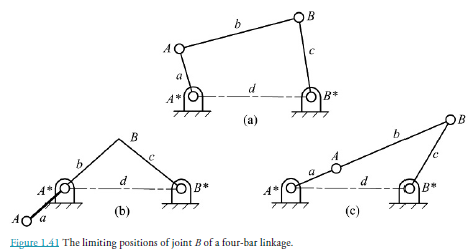

For this notebook's purpose, Fig. 1.41(b) and (c) will be termed as the left- and right-limiting positions, respectively. The limiting positions are given by the expression:
$$r_4^2=r_1^2+(r_2+r_3)^2-2r_1(r_3-r_2)\cos\gamma_{\text{left}}\quad\&\quad r_4^2=r_1^2+(r_2+r_3)^2-2r_1(r_2+r_3)\cos\gamma_{\text{right}}$$
, respectively.

Isolating $\gamma$ for both expressions, we obtain:
$$\gamma_{\text{left}}=\cos^{-1}\left[\dfrac{r_1^2+(r_3-r_2)^2-r_4^2}{2r_1(r_3-r_2)}\right]\quad\&\quad \gamma_{\text{right}}=\cos^{-1}\left[\dfrac{r_1^2+(r_2+r_3)^2-r_4^2}{2r_1(r_2+r_3)}\right]$$
, respectively.

### Limiting Position Implementation

In [15]:
def t_anglelim(r1,r2,r3,r4,arg):
    """Encode arg='left' for the left gamma value for the transmission angle,otherwise, encode arg='right'. Given values are all with respect to x. CCW(+) & CW(-)"""
    if arg=='left':
        theta_2 = 180+np.arccos((r1**2+(r3-r2)**2-r4**2)/(2*r1*(r3-r2)))*(180/np.pi)
    elif arg=='right':
        theta_2 = np.arccos((r1**2+(r2+r3)**2-r4**2)/(2*r1*(r2+r3)))*(180/np.pi)
    print('theta_2 =',theta_2,'°')    

In [16]:
t_anglelim(7,3,8,6,'left')

theta_2 = 237.1216504356225 °


In [17]:
t_anglelim(7,3,8,6,'right')

theta_2 = 29.526265247263105 °


### Sources
<p>Hamilton H. Mabie, Charles F. Reinholtz - Mechanisms and Dynamics of Machinery (1987, Wiley)</p>
<p>Charles E. Wilson, Peter Sadler - Kinematics and Dynamics of Machinery (2003, Pearson Education)</p>
<p>Laurence Gan Lim - Exercise 05, Module: Planar Linkage Design, LBYME2D-EE1, Canvas (2020)</p>
<p>Kenneth J. Waldron - Kinematics, Dynamics, and Design of Machinery (2016, Wiley)</p>

### Acknowledgements
<p>To Charmaine Aguilar - who showed us the mathematical expressions in finding the transmission angle</p>
<p>To Alex Biñas - who derived the expression for the limiting position gamma values </p>

### Additional: Angle Plots as a function of Theta 2

In [18]:
r1=7
r2=3
r3=8
r4=6
theta_2=np.linspace(0,2*np.pi,360)
z = np.sqrt(r1**2+r2**2-(2*r1*r2*np.cos(theta_2)))
gamma = np.arccos((z**2-r3**2-r4**2)/(-2*r3*r4))*(180/np.pi)
alpha=np.arccos((z**2+r4**2-r3**2)/(2*z*r4))*(180/np.pi)
beta1=np.arccos((z**2+r1**2-r2**2)/(2*z*r1))*(180/np.pi)
beta2=-np.arccos((z**2+r1**2-r2**2)/(2*z*r1))*(180/np.pi)
theta_41=(180-(alpha+beta1))
theta_42=(180-(alpha+beta2))
theta_2=theta_2*(180/np.pi)

In [19]:
import matplotlib.pyplot as plt

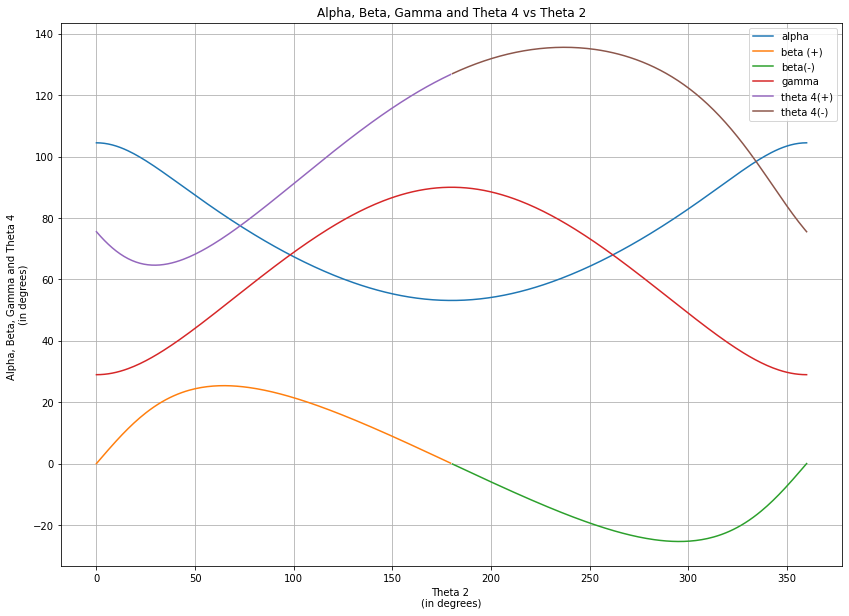

In [20]:
plt.figure(figsize=(14,10))
plt.plot(theta_2,alpha,label='alpha')
plt.plot(theta_2[theta_2<180],beta1[theta_2<180],label='beta (+)')
plt.plot(theta_2[theta_2>=180],beta2[theta_2>=180],label='beta(-)')
plt.plot(theta_2,gamma,label='gamma')
plt.plot(theta_2[theta_2<180],theta_41[theta_2<180],label='theta 4(+)')
plt.plot(theta_2[theta_2>=180],theta_42[theta_2>=180],label='theta 4(-)')
plt.legend()
plt.title('Alpha, Beta, Gamma and Theta 4 vs Theta 2')
plt.ylabel('Alpha, Beta, Gamma and Theta 4 \n(in degrees)')
plt.xlabel('Theta 2 \n(in degrees)')
plt.grid(True)
plt.show()

Note that the minimum and maximum values of theta 4 can be used to find the limiting position of a four bar linkage.